In [1]:
from os import listdir
from os.path import isfile, join
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def getFeatureVectors(dir):
    featureFiles = [join(dir, file) for file in listdir(dir) if isfile(join(dir, file))]
    featureFiles.sort()
    #fileCount = 0
    titleRow = ["Index", "Label", "Data", "Feature Vector"]
    labelList = list()
    characterDataList = list()
    featureVectorList = list()
    for file in featureFiles:
        '''if fileCount == 1:
            break
        fileCount += 1'''
        print("Parsing %s" % (file))
        data = pd.read_csv(file)
        dataFrame = pd.DataFrame(data, columns = titleRow)
        for i in range(len(dataFrame)):
            label = dataFrame['Label'][i].replace('[', '').replace(']', '').split(',')
            characterData =  dataFrame['Data'][i].replace('[', '').replace(']', '').split(',')
            featureVector =  dataFrame['Feature Vector'][i].replace('[', '').replace(']', '').split(',')
            
            labelList.append(label)
            characterDataList.append(characterData)
            featureVectorList.append(featureVector)
            
    for i in range(len(characterDataList)):
        characterDataList[i] = [int(float(value)) for value in characterDataList[i]]
        characterDataList[i] = np.array(characterDataList[i]).reshape(28, 28)
        featureVectorList[i] = [float(value) for value in featureVectorList[i]]
        labelList[i] = [float(value) for value in labelList[i]]
    return labelList, characterDataList, featureVectorList


In [5]:
start_time = time.time()
labelList, characterDataList, featureVectorList = getFeatureVectors('./features/')
print("Extracted details in [%.3f seconds]" % (time.time() - startTime))

Parsing ./features/MNIST_Test_FV_10000.csv
Parsing ./features/MNIST_Test_FV_15000.csv
Parsing ./features/MNIST_Test_FV_20000.csv
Parsing ./features/MNIST_Test_FV_23100.csv
Parsing ./features/MNIST_Test_FV_5000.csv
Parsing ./features/MNIST_Train_FV_10000.csv
Parsing ./features/MNIST_Train_FV_15000.csv
Parsing ./features/MNIST_Train_FV_20000.csv
Parsing ./features/MNIST_Train_FV_25000.csv
Parsing ./features/MNIST_Train_FV_30000.csv
Parsing ./features/MNIST_Train_FV_35000.csv
Parsing ./features/MNIST_Train_FV_40000.csv
Parsing ./features/MNIST_Train_FV_45000.csv
Parsing ./features/MNIST_Train_FV_46900.csv
Parsing ./features/MNIST_Train_FV_5000.csv


NameError: name 'startTime' is not defined

In [6]:
import nmslib

data = np.array(featureVectorList).astype(np.float32)
index = nmslib.init(method='hnsw', space='cosinesimil')
index.addDataPointBatch(data)
index.createIndex({'post': 2}, print_progress=True)

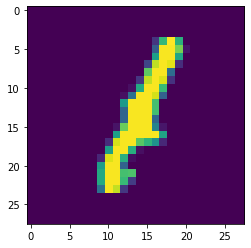

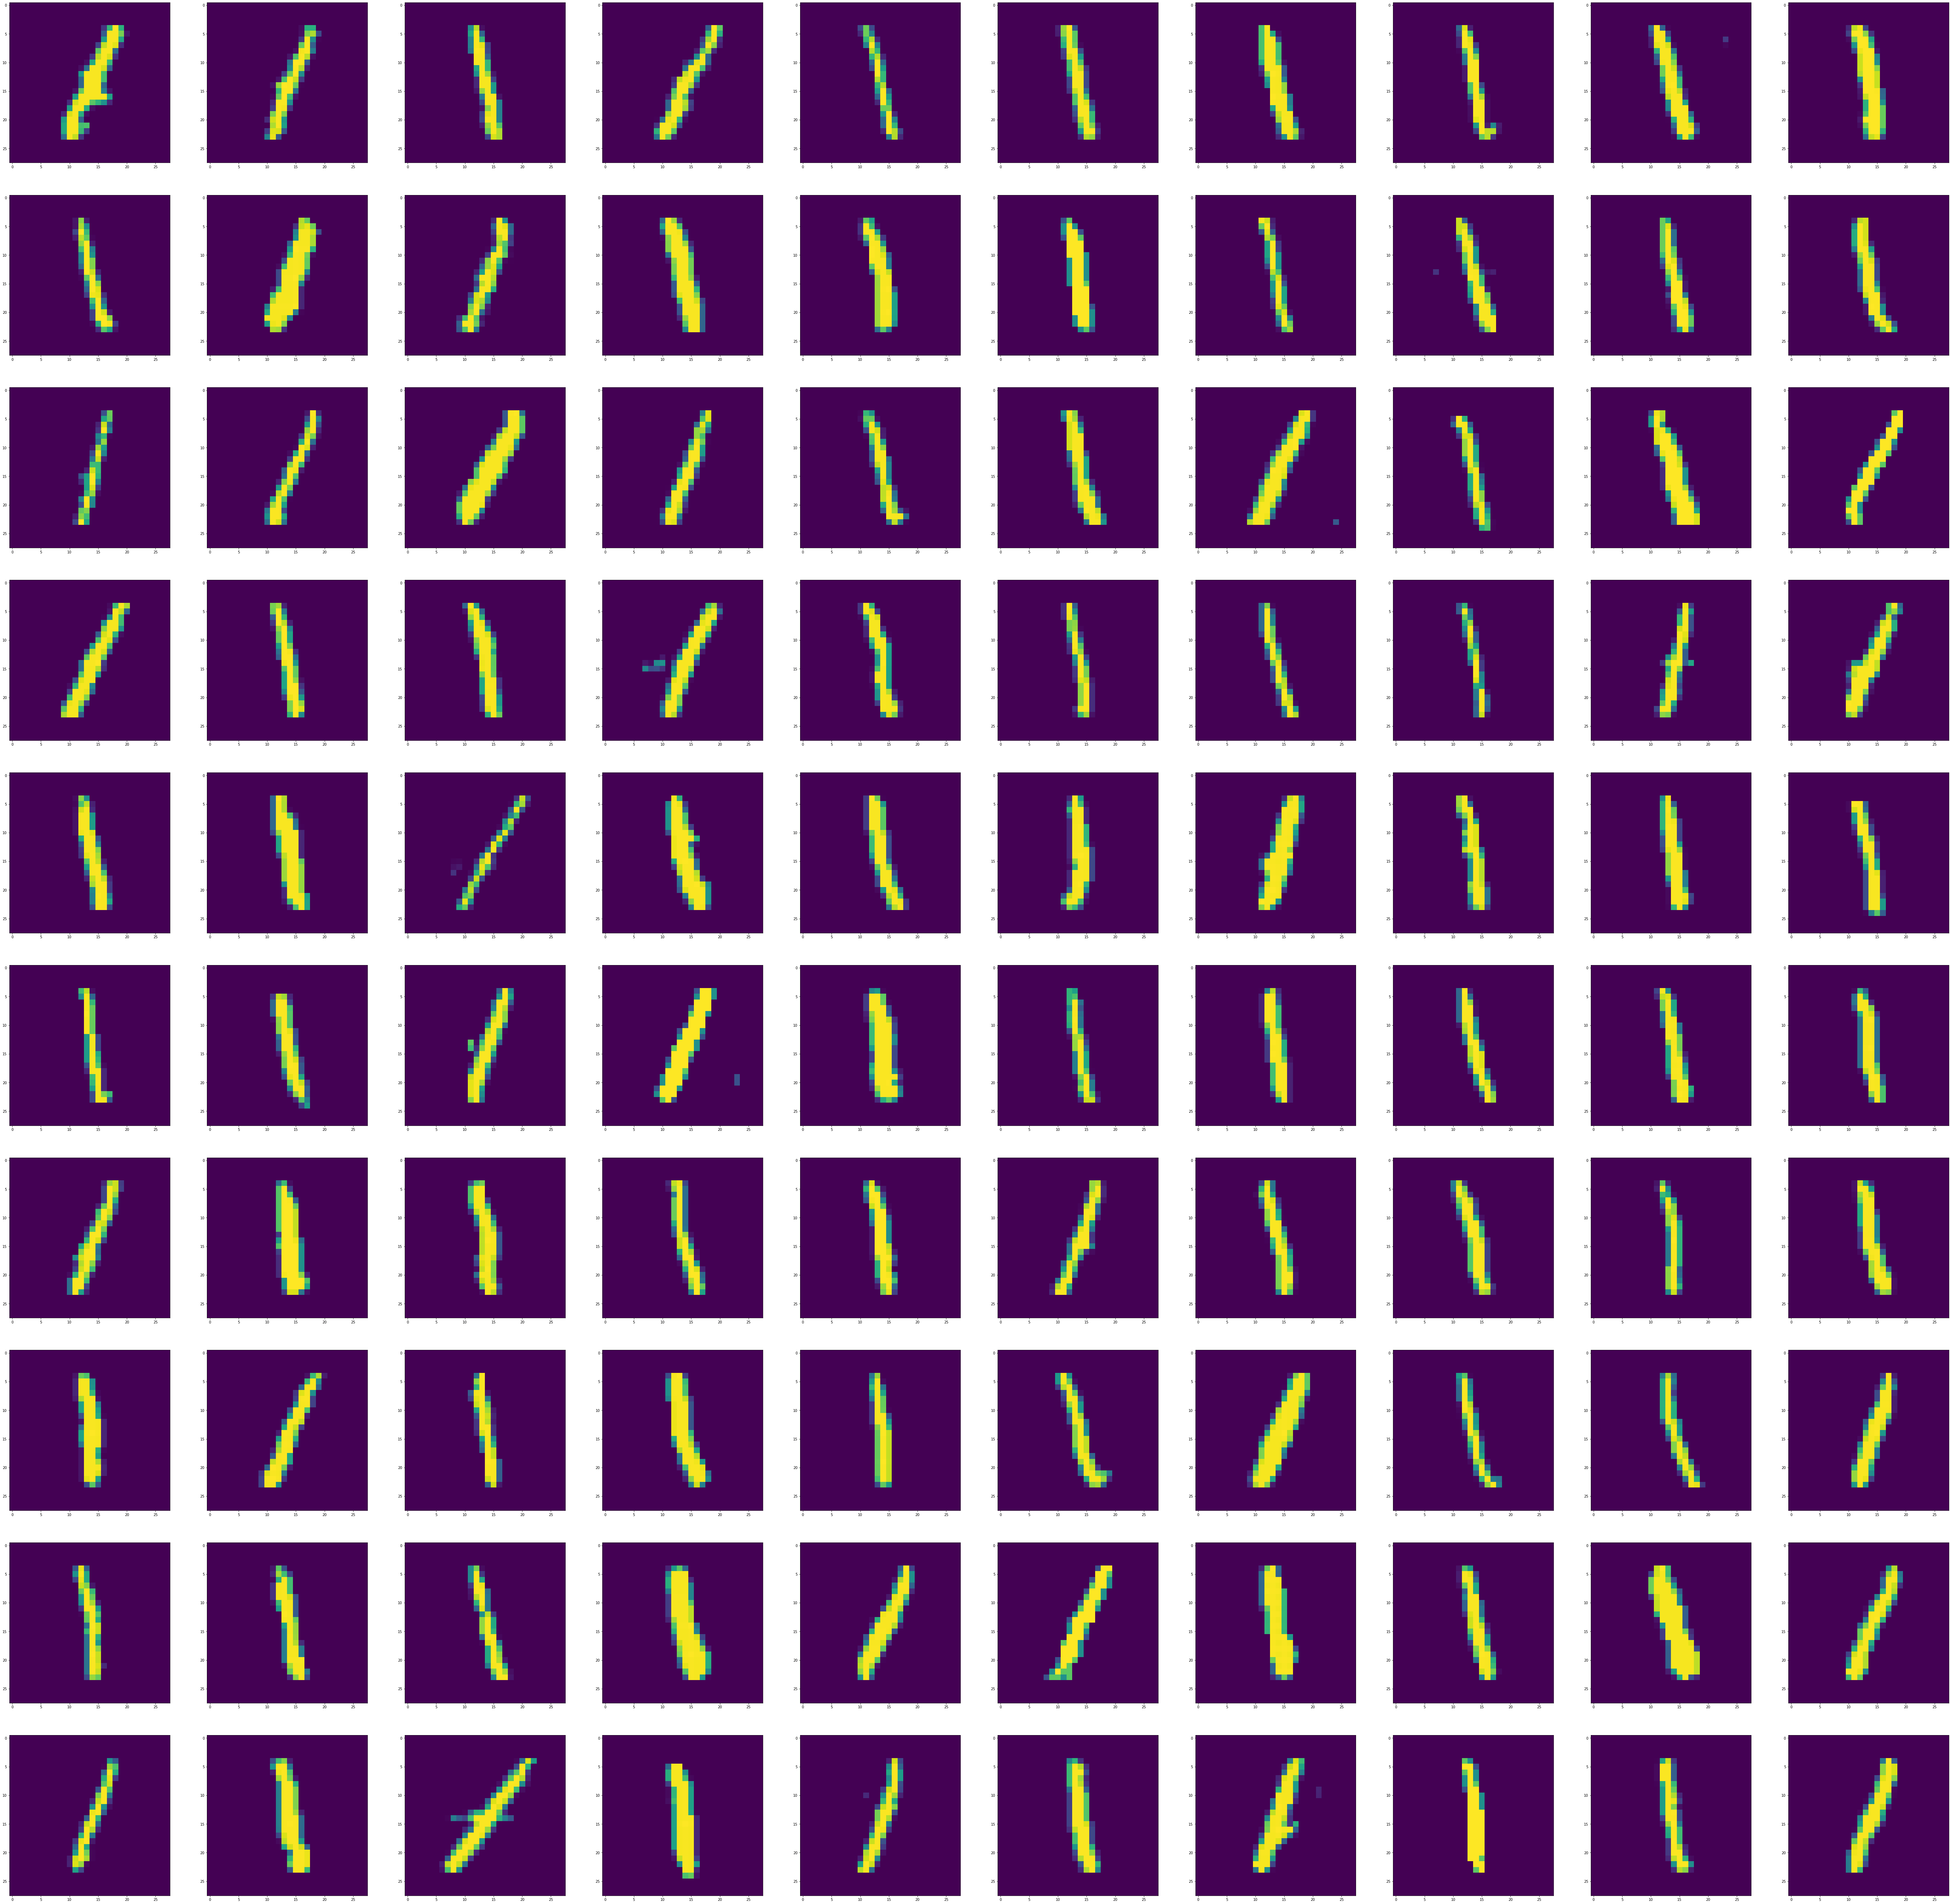

In [7]:
ids, distances = index.knnQuery(data[0], k=100)
plt.imshow(characterDataList[0])
plt.show()

fir, axs = plt.subplots(10, 10, figsize=(100, 100), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i, id in enumerate(ids):
    axs[i].imshow(characterDataList[id])
plt.show()

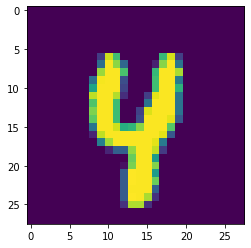

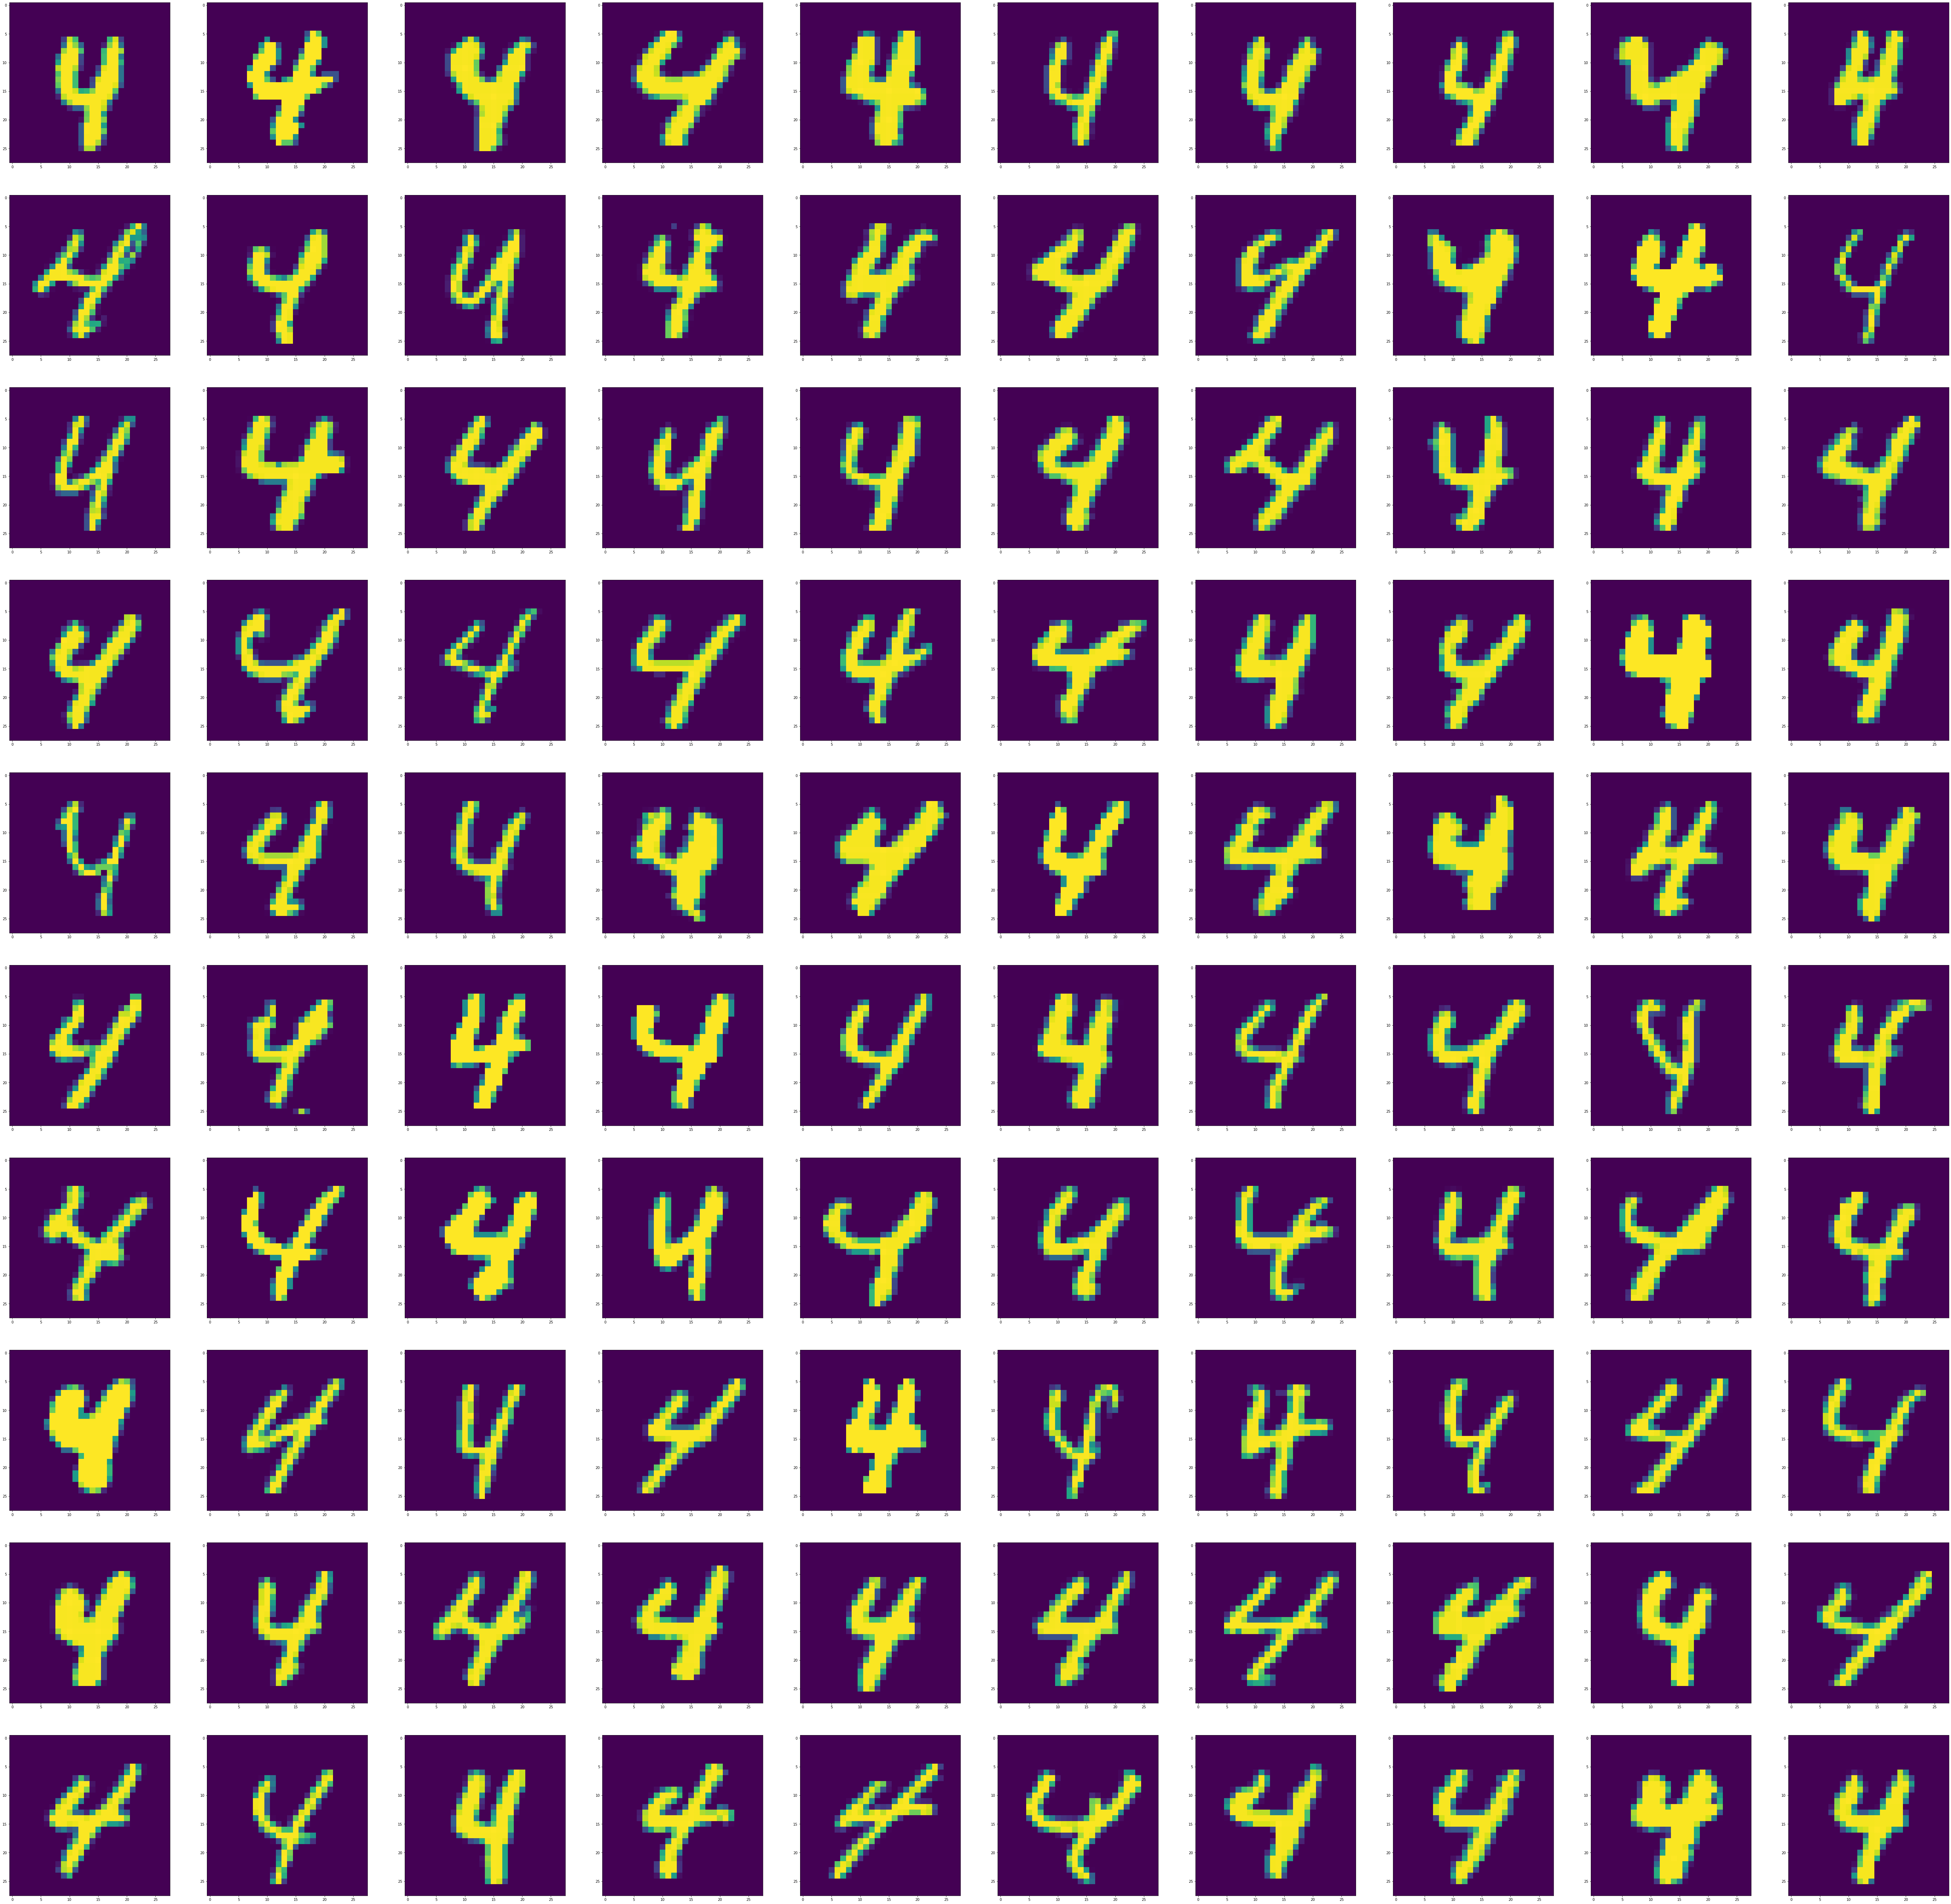

In [10]:
ids, distances = index.knnQuery(data[1], k=100)
plt.imshow(characterDataList[1])
plt.show()

fir, axs = plt.subplots(10, 10, figsize=(100, 100), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i, id in enumerate(ids):
    axs[i].imshow(characterDataList[id])
plt.show()

Search digit:


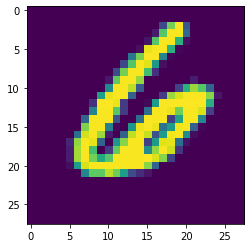

Top 100 search results:


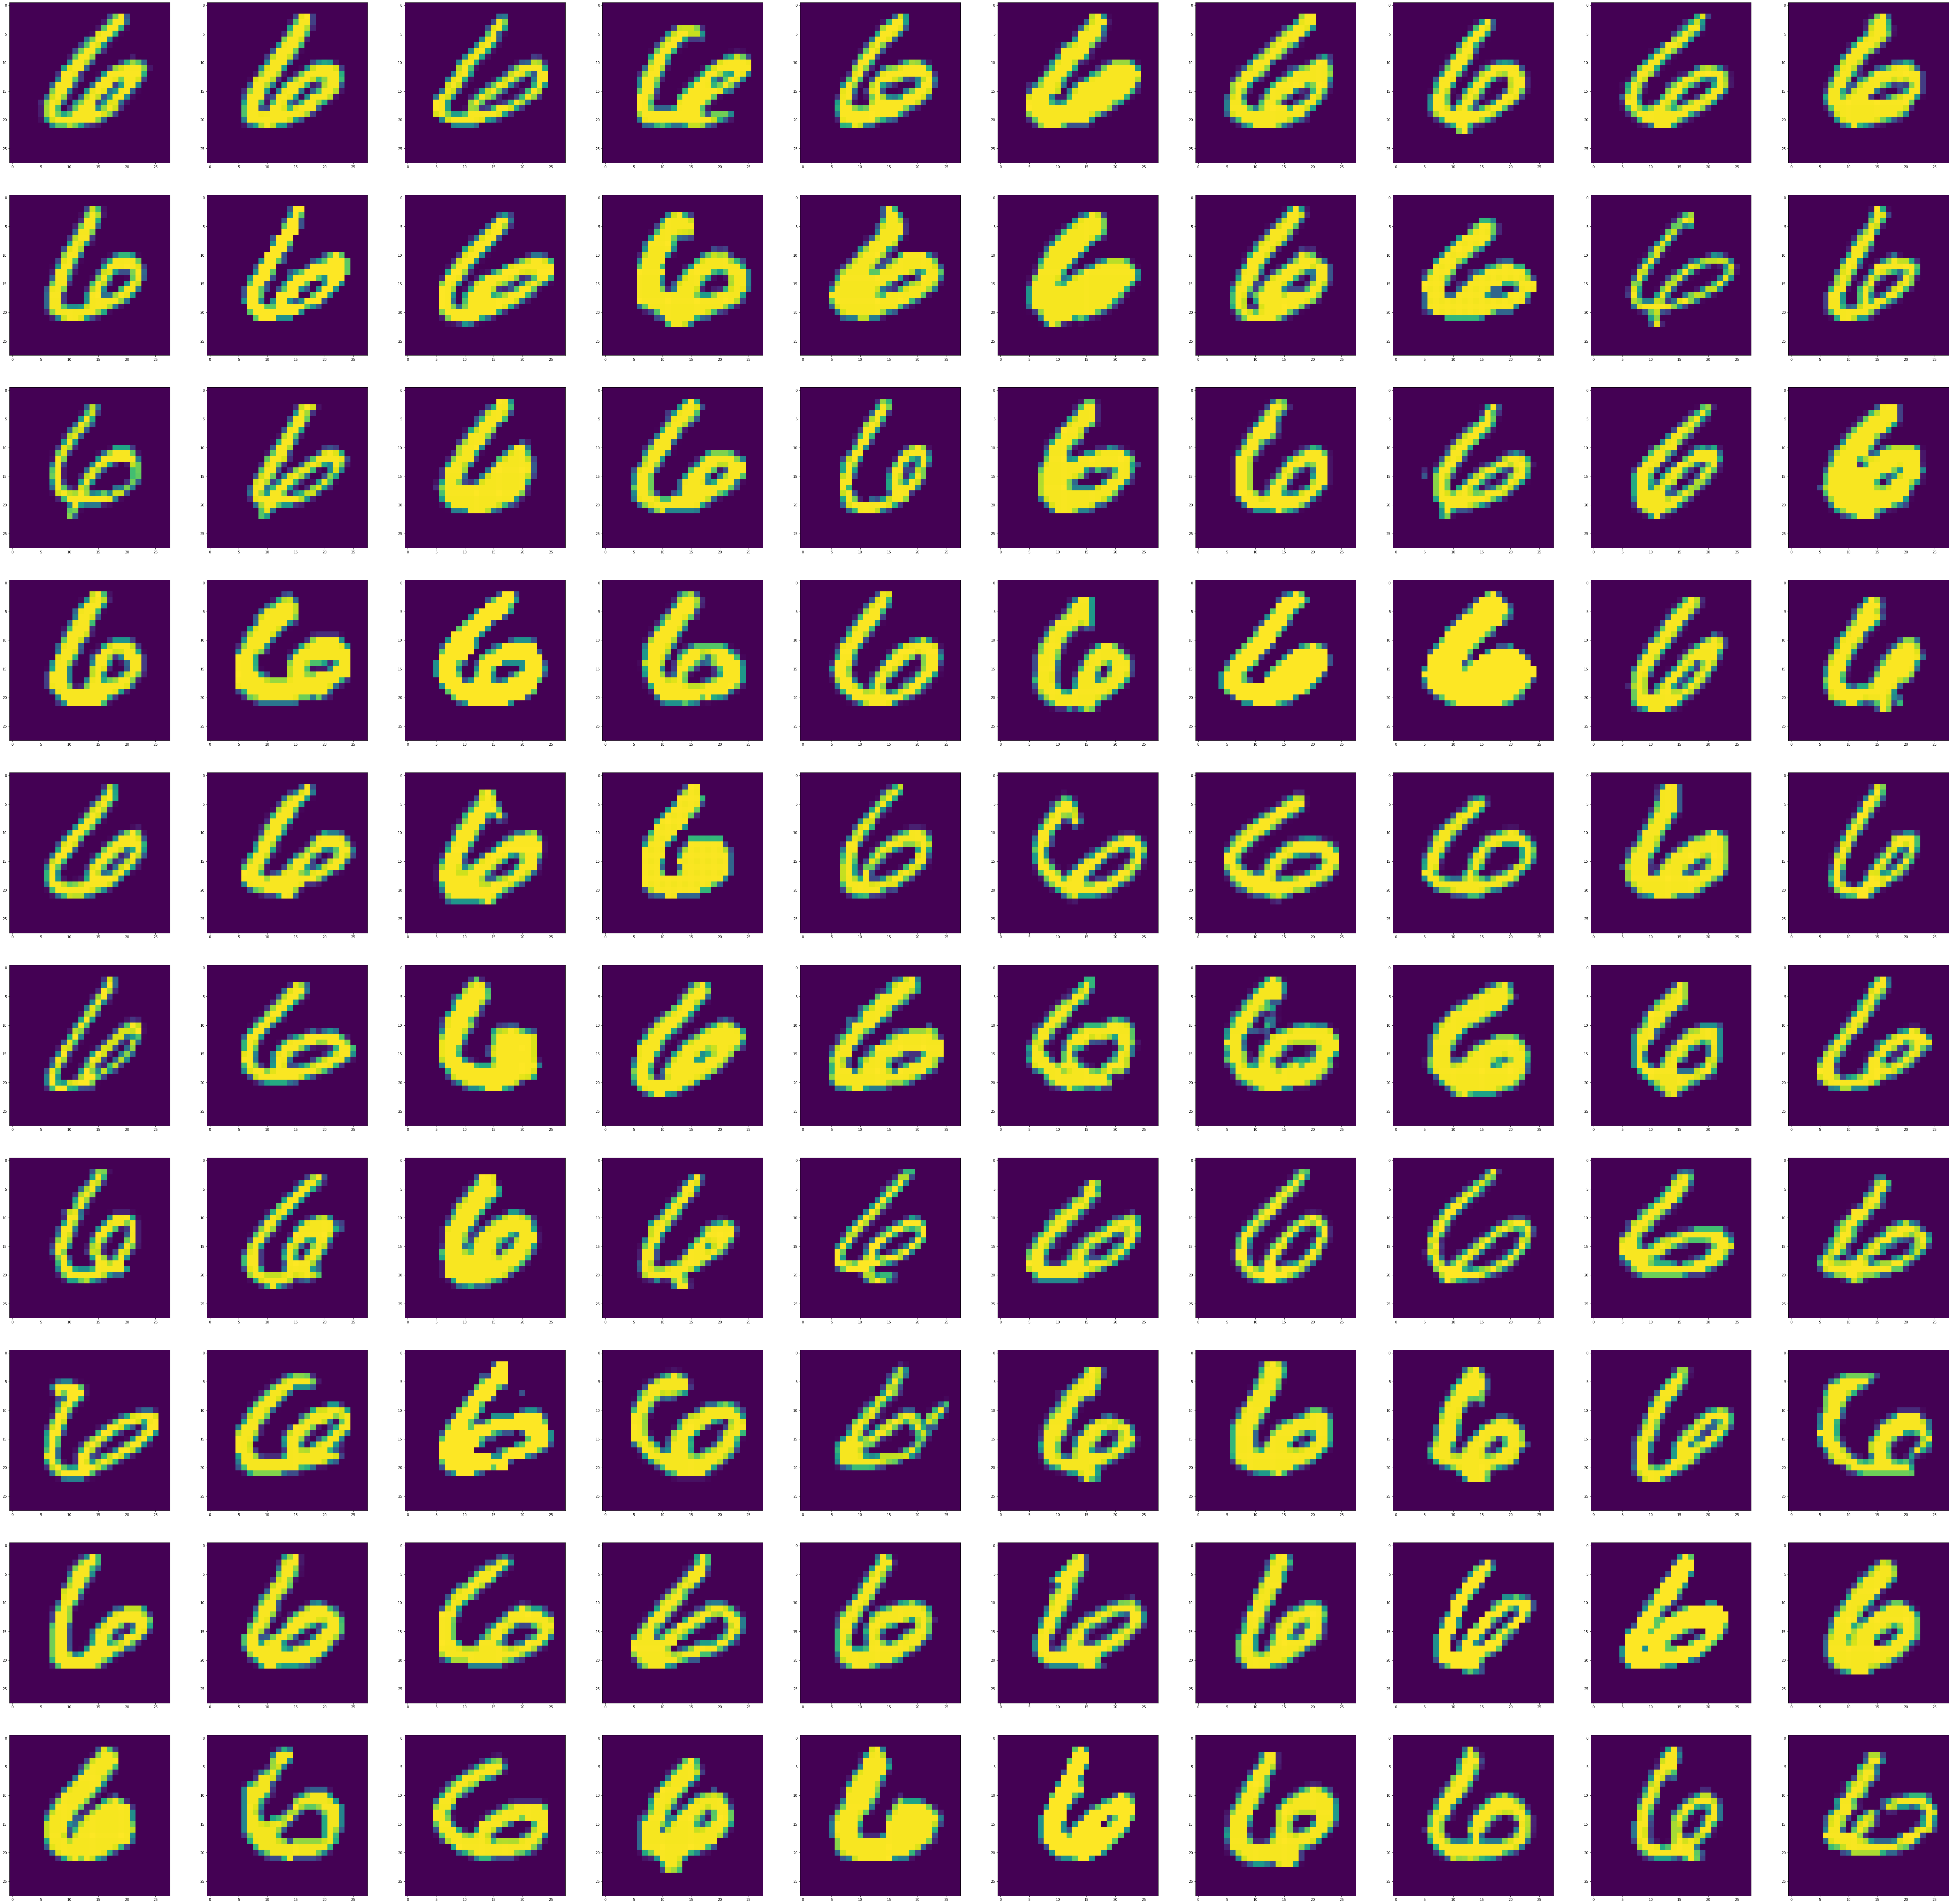

In [11]:
ids, distances = index.knnQuery(data[2], k=100)
print('Search digit:')
plt.imshow(characterDataList[2])
plt.show()

print('Top 100 search results:')
fir, axs = plt.subplots(10, 10, figsize=(100, 100), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i, id in enumerate(ids):
    axs[i].imshow(characterDataList[id])
plt.show()

Search digit:


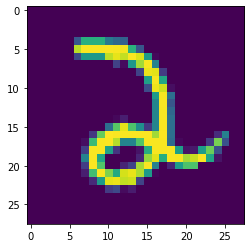

Top 100 search results:


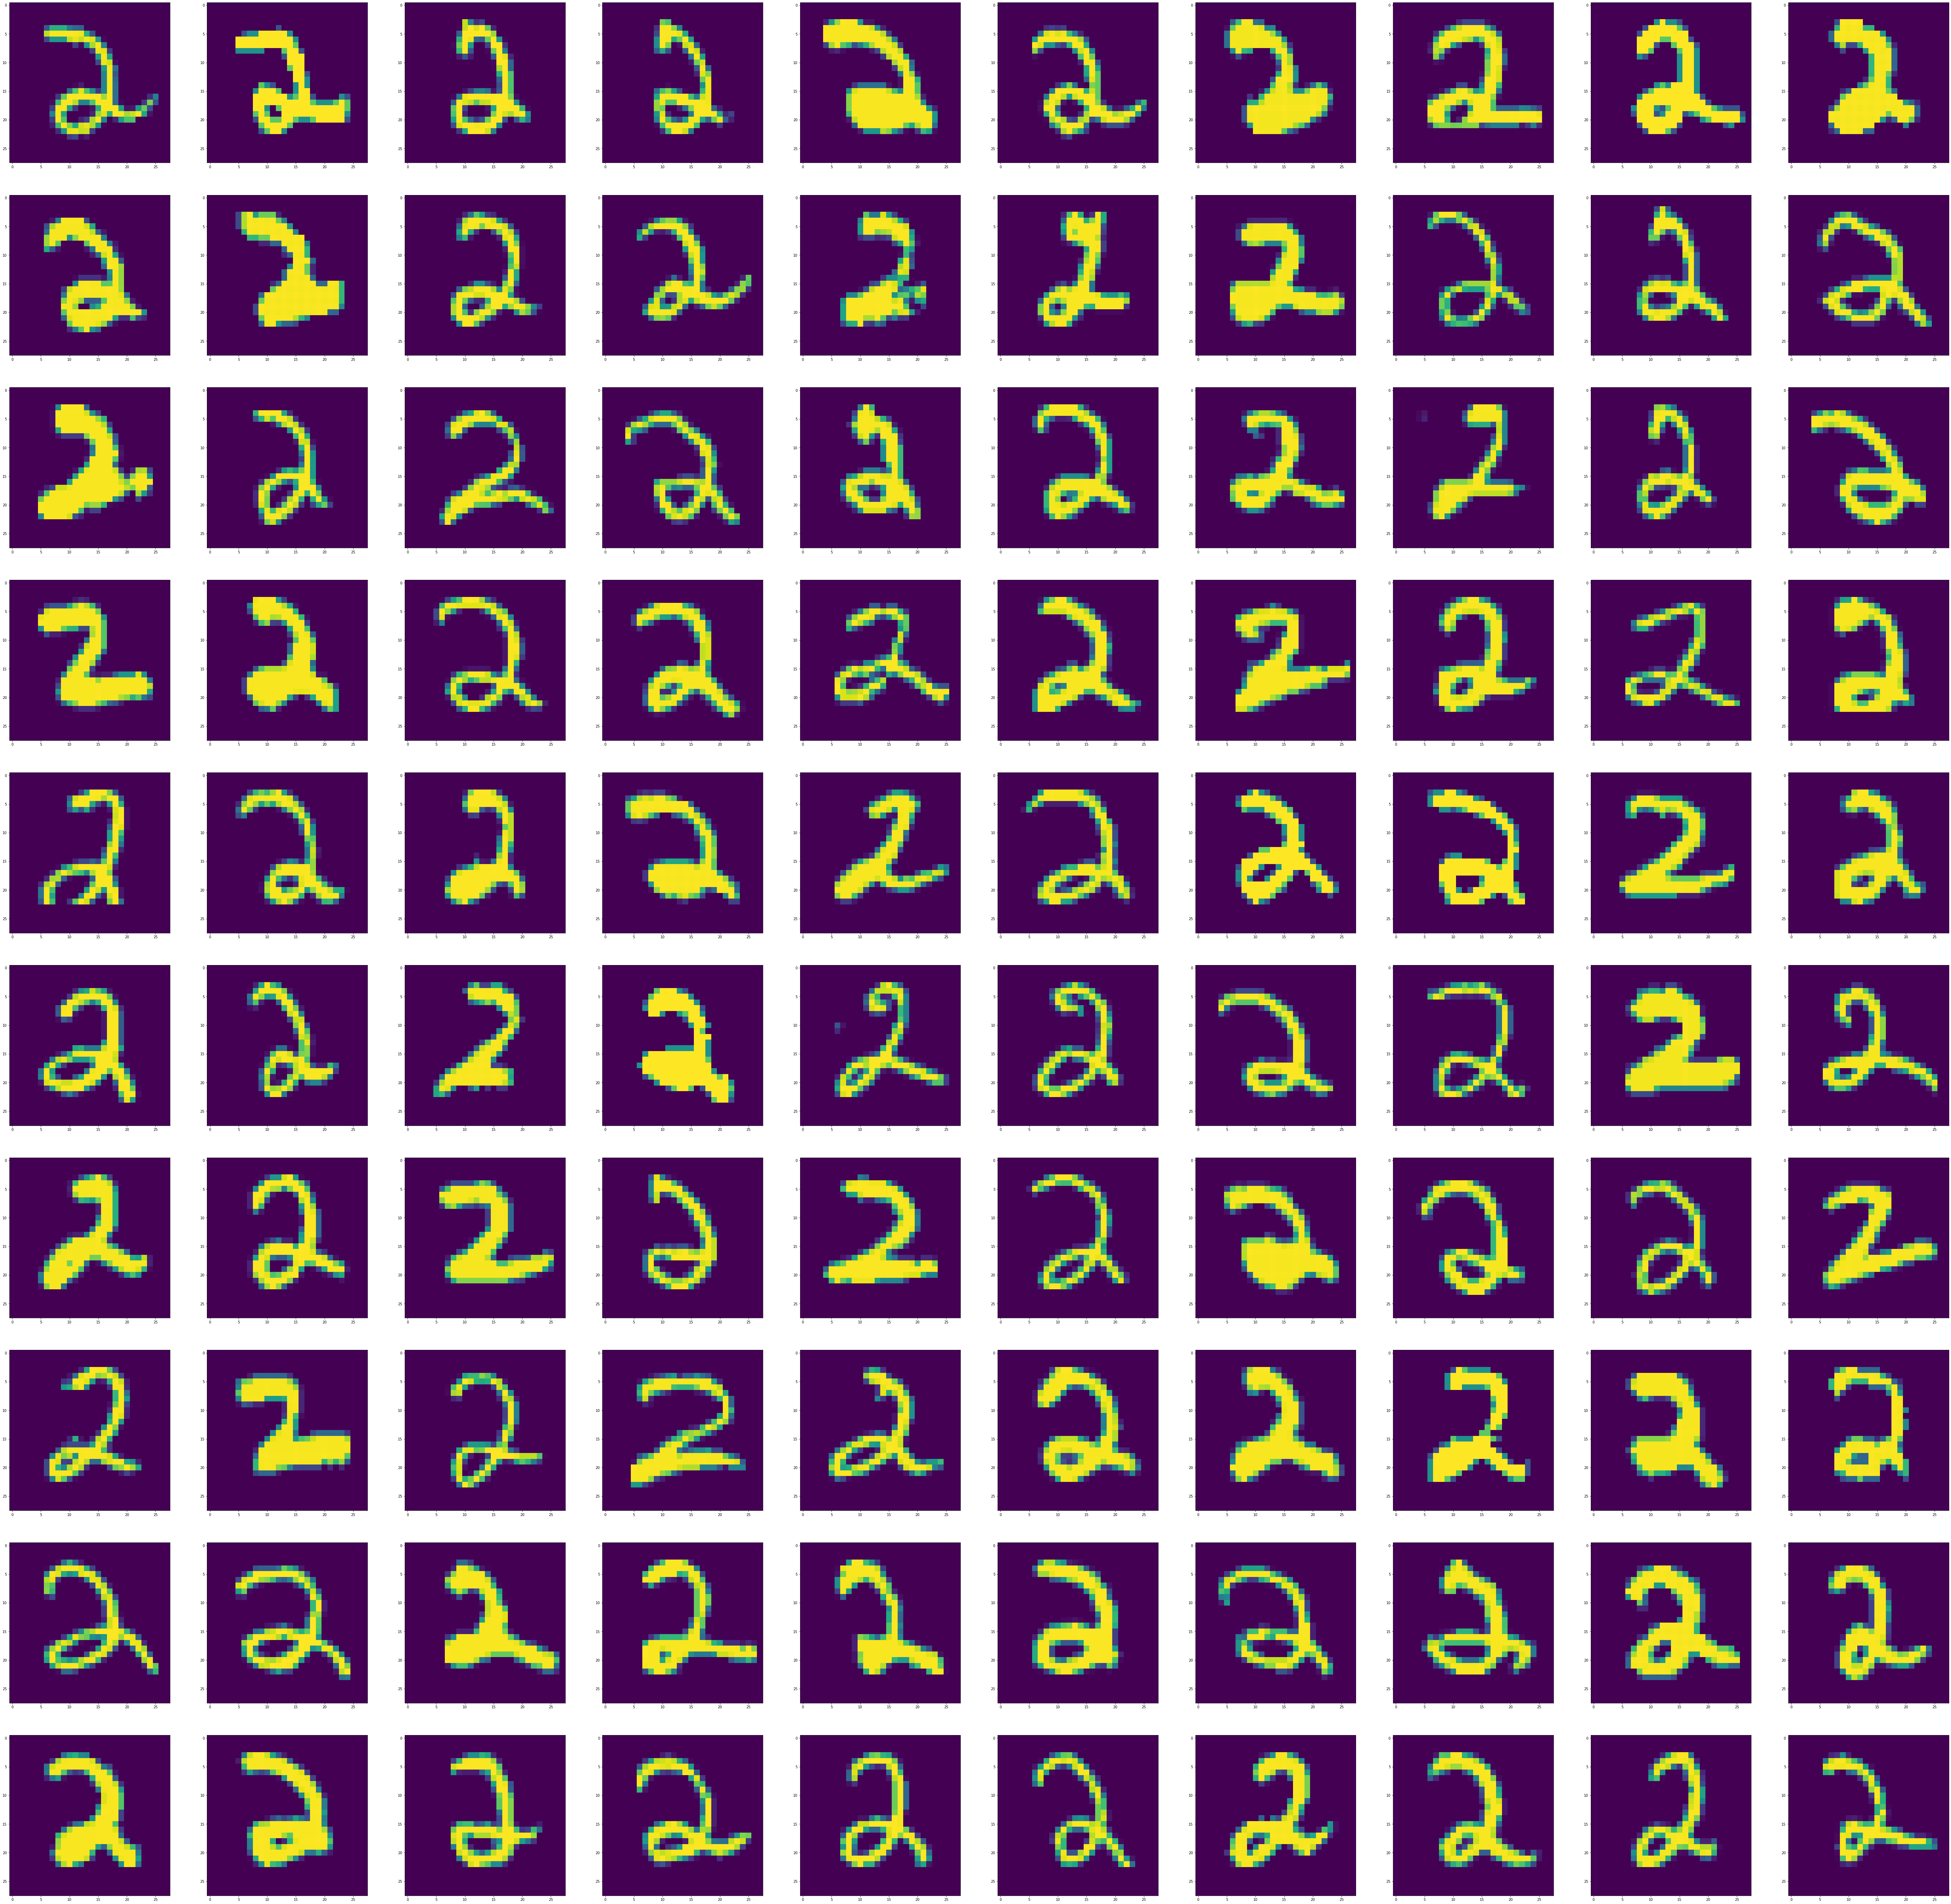

In [13]:
ids, distances = index.knnQuery(data[8], k=100)
print('Search digit:')
plt.imshow(characterDataList[8])
plt.show()

print('Top 100 search results:')
fir, axs = plt.subplots(10, 10, figsize=(100, 100), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i, id in enumerate(ids):
    axs[i].imshow(characterDataList[id])
plt.show()